In [69]:
import numpy as np

# Path to your text file
dict_RMSE = {
    '1/0.75 * KL' : r'energy_alpha0.75_lr0.001_epochs500_Dtypew-1KLlosstype_standard_splitNone_test_error.txt',
    '1/1.25 * KL' : r'energy_alpha1.25_lr0.001_epochs500_Dtypew-1KLlosstype_standard_splitNone_test_error.txt',
    'D_AR(0.5)' : r'energy_alpha0.5_lr0.001_epochs500_DtypeARlosstype_standard_splitNone_test_error.txt',
    'D_AR(0.75)' : r'energy_alpha0.75_lr0.001_epochs500_DtypeARlosstype_standard_splitNone_test_error.txt',
    'D_AR(1.25)' : r'energy_alpha1.25_lr0.001_epochs500_DtypeARlosstype_standard_splitNone_test_error.txt',
    'D_AR(1.5)' : r'energy_alpha1.5_lr0.001_epochs500_DtypeARlosstype_standard_splitNone_test_error.txt',
    'D_AR(2.0)' : r'energy_alpha2.0_lr0.001_epochs500_DtypeARlosstype_standard_splitNone_test_error.txt',
    'VI' : r'energy_alpha-99_lr0.001_epochs500_DtypeKLlosstype_standard_splitNone_test_error.txt',
}

dict_ll = {
    '1/0.75 * KL' : r'energy_alpha0.75_lr0.001_epochs500_Dtypew-1KLlosstype_standard_splitNone_test_ll.txt',
    '1/1.25 * KL' : r'energy_alpha1.25_lr0.001_epochs500_Dtypew-1KLlosstype_standard_splitNone_test_ll.txt',
    'D_AR(0.5)' : r'energy_alpha0.5_lr0.001_epochs500_DtypeARlosstype_standard_splitNone_test_ll.txt',
    'D_AR(0.75)' : r'energy_alpha0.75_lr0.001_epochs500_DtypeARlosstype_standard_splitNone_test_ll.txt',
    'D_AR(1.25)' : r'energy_alpha1.25_lr0.001_epochs500_DtypeARlosstype_standard_splitNone_test_ll.txt',
    'D_AR(1.5)' : r'energy_alpha1.5_lr0.001_epochs500_DtypeARlosstype_standard_splitNone_test_ll.txt',
    'D_AR(2.0)' : r'energy_alpha2.0_lr0.001_epochs500_DtypeARlosstype_standard_splitNone_test_ll.txt',
    'VI' : r'energy_alpha-99_lr0.001_epochs500_DtypeKLlosstype_standard_splitNone_test_ll.txt',
}

# Read numeric values from the text file
dict = dict_RMSE
print('RMSE')
for k,v in dict.items():
    with open(v, 'r') as txt_file:
        numeric_values = [float(line.strip()) for line in txt_file]
        print(k, np.mean(numeric_values), '+/-', 1.96*np.std(numeric_values)/np.sqrt(len(numeric_values)))

dict = dict_ll
print('LL')
for k,v in dict.items():
    with open(v, 'r') as txt_file:
        numeric_values = [float(line.strip()) for line in txt_file]
        print(k, np.mean(numeric_values), '+/-', 1.96*np.std(numeric_values)/np.sqrt(len(numeric_values)))

RMSE
1/0.75 * KL 1.4192412098245013 +/- 0.05277863697215239
1/1.25 * KL 1.2796241943743218 +/- 0.054536317604502414
D_AR(0.5) 1.6195313310101778 +/- 0.05480210155234534
D_AR(0.75) 1.4176454533071472 +/- 0.053416825326605924
D_AR(1.25) 1.2804762877688591 +/- 0.05414442537787038
D_AR(1.5) 1.2460598332887316 +/- 0.05891464582137246
D_AR(2.0) 1.2019514350879916 +/- 0.05456464939892821
VI 1.3443717406567326 +/- 0.06259123757731512
LL
1/0.75 * KL 1.820499887193676 +/- 0.024064321308109544
1/1.25 * KL 1.6761421460465675 +/- 0.03595493544280744
D_AR(0.5) 2.0093539195465357 +/- 0.018641403864109635
D_AR(0.75) 1.81790073411193 +/- 0.02448029876894426
D_AR(1.25) 1.677093437800327 +/- 0.03557235203577023
D_AR(1.5) 1.648533139776819 +/- 0.045761625835767095
D_AR(2.0) 1.6173072445819257 +/- 0.04923619395045886
VI 1.7401125294713846 +/- 0.03612014638295593


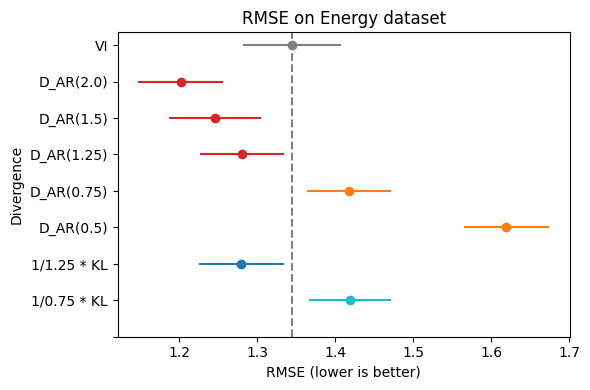

In [76]:
import matplotlib.pyplot as plt

plot = 'RMSE'
with_weighted_KL = True

if plot == 'RMSE':
    dict = dict_RMSE
elif plot == 'LL':
    dict = dict_ll

dict_colors = {
    'D_AR(0.5)' : 'tab:orange',
    'D_AR(0.75)' : 'tab:orange',
    'VI' : 'gray',
    'D_AR(1.25)' : 'tab:red',
    'D_AR(1.5)' : 'tab:red',
    'D_AR(2.0)' : 'tab:red',
    '1/0.75 * KL' : 'tab:cyan',
    '1/1.25 * KL' : 'tab:blue'
}

fig, ax = plt.subplots(figsize=(6, 4))

yticks = [-1]
yticklabels = ['']
i = 0
for k,v in dict.items():
    with open(v, 'r') as txt_file:
        numeric_values = [float(line.strip()) for line in txt_file]
    mean = np.mean(numeric_values)
    conf_interval = 1.96*np.std(numeric_values)/np.sqrt(len(numeric_values))
    if 'KL' in k:
        if with_weighted_KL:
            ax.errorbar(mean, i, xerr=conf_interval, fmt='o', color=dict_colors[k], label=k)
        else:
            ax.errorbar(mean, i, xerr=conf_interval, fmt='o', color="white", label=k)
        
    else :
        ax.errorbar(mean, i, xerr=conf_interval, fmt='o', color=dict_colors[k], label=k)
    if k =='VI' :
        ax.axvline(x=mean, linestyle='--', color='gray')
    yticks.append(i)
    yticklabels.append(k)
    i+=1



ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

if plot == 'RMSE':
    plt.ylabel('Divergence')
    plt.xlabel('RMSE (lower is better)')
    plt.title('RMSE on Energy dataset')
elif plot == 'LL':
    plt.ylabel('Divergence')
    plt.xlabel('LL (lower is better)')
    plt.title('Log-likelihood on Energy dataset')

plt.tight_layout()

file_path = 'figures/energy_' + plot
if with_weighted_KL:
    file_path += '_with_weighted_KL'
else :
    file_path += '_wo_with_weighted_KL'

plt.savefig(file_path + '.png')
plt.show()